In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


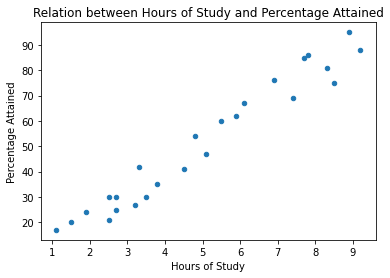

In [14]:
data.plot(x='Hours', y='Scores', kind='scatter')
plt.title('Relation between Hours of Study and Percentage Attained')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Attained')
plt.show()



In [15]:
X = data['Hours'].to_numpy().reshape((-1, 1))
y = data['Scores'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)



Intercept: 2.018160041434662
Coefficients: [9.91065648]


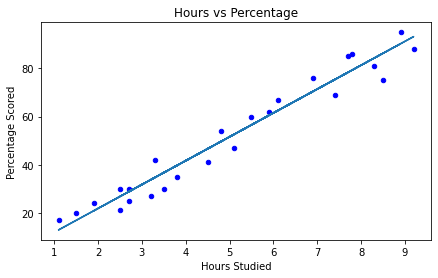

In [16]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
fitline = regressor.coef_[0] * X_train + regressor.intercept_
data.plot(x='Hours', y='Scores', kind='scatter', figsize=(7, 4), color='b')
plt.plot(X_train, fitline)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()


In [17]:
y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R-squared (Coefficient of Determination):', r2)



Mean Absolute Error: 4.183859899002982
R-squared (Coefficient of Determination): 0.9454906892105354


In [18]:
Actual_Prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Actual_Prediction_df



,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
hours = 9.25
predicted_score = regressor.predict([[hours]]).round(2)

print("If a student invests {} hours in studying, he/she is likely to get {}%.".format(hours, predicted_score))

If a student invests 9.25 hours in studying, he/she is likely to get [93.69]%.
